In [299]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#sourceData = pd.read_csv("customers.csv",lineterminator='\n')

In [3]:
#sourceData.shape

In [4]:
#sourceData[sourceData.isna()==False]

In [5]:
#sourceData.head()

In [6]:
#sourceData.tail()

In [7]:
#sourceData.info()

In [19]:
conn = sql.connect("CustomerDB.db")

In [20]:
sourceData = pd.read_sql_query("select * from 'test';",conn)

In [21]:
sourceData.shape

(4194, 74)

In [22]:
columnsCustomer = ['Customers.id',
'Customers.fname',
'Customers.lname',
'Customers.create_date',
'Customers.mailing',
'Customers.last_modified']
customerDf = sourceData[columnsCustomer]

In [23]:
customerDf.shape

(4194, 6)

In [24]:
columnsOrders = ['Orders.id',                        
'Orders.fname',         
'Orders.lname',                
'Orders.order_number',         
'Orders.currency',              
'Orders.subtotal',                  
'Orders.shipping',                  
'Orders.total',                 
'Orders.shipping_carrier',       
'Orders.shipping_method',         
'Orders.tracking',         
'Orders.payment_status',           
'Orders.payment_date',            
'Orders.payment_type',             
'Orders.payment_amount',           
'Orders.payment_id',           
'Orders.payment_code',             
'Orders.status',                
'Orders.placed_date',              
'Orders.updated_date',              
'Orders.shipped_date',             
'Order_Items.id',                   
'Order_Items.product_id',          
'Order_Items.product_name',       
'Order_Items.qty',                  
'Order_Items.price',                
'Order_Items.cost']
ordersDf = sourceData[columnsOrders]

In [25]:
ordersDf.shape

(4194, 27)

In [26]:
columnsProducts =['Products.id',                      
'Products.template',               
'Products.vendor',                  
'Products.import_id',               
'Products.name',                   
'Products.display_name',           
'Products.list_price',              
'Products.price',                   
'Products.cost',                    
'Products.flags',                   
'Products.last_modified',           
'Products.taxable',                 
'Products.shopping_gtin',           
'Products.shopping_brand',         
'Products.shopping_mpn',           
'Products.shopping_flags',          
'Products.amazon_asin',            
'Products.amazon_item_type',       
'Products.google_shopping_id',     
'Products.google_shopping_type',   
'Products.google_shopping_cat',    
'Products.shopping_type',         
'Products.pricegrabber_cat',       
'Products.thefind_cat',           
'Products.quickbooks_id',          
'Products.qb_edit_sequence',        
'Products.short_description',      
'Products.long_description',       
'Products.seo_title',              
'Products.seo_url',                
'Products.unit',                
'Products.packaging',             
'Products.multiple',               
'Products.upc',                     
'Products.hcpcs',                  
'Products.case_qty',                
'Products.import_flags',           
'Products.shipping_length',         
'Products.shipping_width',         
'Products.shipping_height',         
'Products.family_id']
productsDF = sourceData[columnsProducts]

In [27]:
productsDF.shape

(4194, 41)

In [29]:
customerDf.to_sql(name="Customer2",con = conn)

In [30]:
ordersDf.to_sql(name="Orders",con=conn)

In [32]:
productsDF.to_sql(name="Product2",con=conn)

In [33]:
cur = conn.cursor()

In [34]:
cur.execute("select * from Customer2 limit 5;")
results = cur.fetchall()
print(results)

[(0, '797', 'Christy', 'Dill', '1426018724', '1.0', '1437764306'), (1, '3', 'John', 'Smith', '1386089139', '1.0', '1437764354'), (2, '3', 'John', 'Smith', '1386089139', '1.0', '1437764354'), (3, '4', 'James', 'Anderson', '1386780263', '1.0', '1437762646'), (4, '5', 'Abraham', 'Pollak', '1386861599', '0.0', '1437764316')]


In [36]:
cur.execute("select * from 'Orders' limit 1;")
results = cur.fetchall()
print(results)

[(0, '3758', 'Christy', 'Dill', '3758', 'USD', '57.2', '9.95', '64.29', 'fedex', '11|Ground', '5.7204E+14', '3.0', '1426019099.0', 'authorize.net', '64.29', '6993607863', '510142', '1', '1426019099', '1438868410.0', '1426100922.0', '5284', '2310.0', 'Basic Rollators, Green', '1', '57.2', '44.0')]


In [37]:
cur.execute("select * from 'Product2' limit 1;")
results = cur.fetchall()
print(results)

[(0, '2310.0', 'sub-product-detail.html', '1.0', '3.0', 'Basic Steel Rollators,Green', 'Basic Lightweight Rollators For Adults, With Seat, Green, 6" Wheels, Foldable, ONLY 14 LBS', '80.7', '57.64', '44.0', '0.0', '1463162723.0', '1.0', '10884400000000.0', 'MEDLINE', 'MDS86850EGS', '62.0', 'B00I6GQE0A', 'health-care-products', 'generic/online%3Aen%3AUS%3A2310', 'Walking Aids > Rollators, & Walkers > Rollators', 'Health & Beauty > Health Care', 'Miscellaneous', 'Health & Beauty > Medical Supplies > Medical Aids', 'Health & Beauty > Medical Supplies > Medical Aids', '8000064C-1434298761', '1450324676.0', 'ROLLATOR,BASIC,STEEL,6",GREEN', '<ul><li>  Classically designed, value priced</li><li>  Constructed of a durable powder-coated steel</li><li>  Comes standard with convenient storage bag under the seat</li></ul>', 'Basic Lightweight Rollators For Adults, With Seat, Green, 6" Wheels, Foldable, ONLY 14 LBS | MEDLINE - MDS86850EGS', 'Basic-Rollators-For-Adults-With-Seat-Green-6-Wheels-Foldab

In [38]:
customerDf = pd.read_sql_query("select * from Customer2;",conn) 

In [39]:
customerDf.shape

(4194, 7)

In [40]:
customerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
index                      4194 non-null int64
Customers.id               4194 non-null object
Customers.fname            4194 non-null object
Customers.lname            4194 non-null object
Customers.create_date      4194 non-null object
Customers.mailing          4194 non-null object
Customers.last_modified    4194 non-null object
dtypes: int64(1), object(6)
memory usage: 229.4+ KB


In [41]:
orderDf = pd.read_sql_query("select * from 'Orders'; ",conn)

In [42]:
orderDf.shape

(4194, 28)

In [43]:
productDf = pd.read_sql_query("select * from 'Product2';",conn)

In [44]:
productDf.shape

(4194, 42)

In [45]:
productDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 42 columns):
index                            4194 non-null int64
Products.id                      4194 non-null object
Products.template                4194 non-null object
Products.vendor                  4194 non-null object
Products.import_id               4194 non-null object
Products.name                    4194 non-null object
Products.display_name            4194 non-null object
Products.list_price              4194 non-null object
Products.price                   4194 non-null object
Products.cost                    4194 non-null object
Products.flags                   4194 non-null object
Products.last_modified           4194 non-null object
Products.taxable                 4194 non-null object
Products.shopping_gtin           4194 non-null object
Products.shopping_brand          4194 non-null object
Products.shopping_mpn            4194 non-null object
Products.shopping_flags       

In [46]:
mergeDf = pd.concat([customerDf,orderDf,productDf],axis=1)

In [47]:
mergeDf.shape

(4194, 77)

In [48]:
mergeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 77 columns):
index                            4194 non-null int64
Customers.id                     4194 non-null object
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null object
Customers.mailing                4194 non-null object
Customers.last_modified          4194 non-null object
index                            4194 non-null int64
Orders.id                        4194 non-null object
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null object
Orders.shipping                  4194 non-null object
Orders.total                     4194 non-null object
Orders.shipping_carrier        

In [49]:
mergeDf.tail()

,index,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,index,Orders.id,Orders.fname,...,Products.packaging,Products.multiple,Products.upc,Products.hcpcs,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id
4189,4189,3730,Nora,Fontana,1463408698,1.0,1463408698,4189,17421,Nora,...,24 Each / Pack,1 PK,884389000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24,418.0,5.0,5.0,7.0,PF06157
4190,4190,3732,Kennithe,Tecora,1463412756,1.0,1463412756,4190,17425,Kennithe,...,1 Each / Each,1 EA,884389000000.0,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1,128.0,14.6,4.1,18.0,PF08485
4191,4191,3733,Tinna,Randall,1463413245,1.0,1463413245,4191,17426,Tinna,...,1 Each / Each,1 CS,822383000000.0,K0800,1,128.0,45.0,20.75,20.75,PM36
4192,4192,3735,HALIMAH,SHAHID,1463416687,1.0,1463416687,4192,17431,HALIMAH,...,1 Each / Each,1 EA,80196775531.0,E0149,1,8.0,25.25,8.6,23.2,PF04829
4193,4193,3736,Michael,Kiernan,1463418049,1.0,1463418049,4193,17434,Michael,...,100 Each / Box,1 BX,822383000000.0,A4245,100,0.0,6.0,5.25,3.0,PF03816


<h1> Missing Values</h1>

In [50]:
mergeDf.tail(n=1000)

,index,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,index,Orders.id,Orders.fname,...,Products.packaging,Products.multiple,Products.upc,Products.hcpcs,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id
3194,3194,2734,Shadirah,Myrick,1457296138,1.0,1457296138,3194,13801,Shadirah,...,1 Each / Each,1 CS,822383000000.0,E1399,1,0.0,23.75,23.25,7.1,WZ81
3195,3195,2735,Don,Fox,1457328861,1.0,1457328861,3195,13818,Don,...,24 Each / Pack,1 PK,884389000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24,418.0,5.0,5.0,7.0,PF06157
3196,3196,2736,Pamela,Perrin,1457329404,1.0,1457329404,3196,13819,Pamela,...,40 Each / Box,1 BX,822383000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,1,0.0,6.0,4.0,6.0,PF33617
3197,3197,2737,Stephen,Ralston,1457364012,1.0,1457364012,3197,13830,Stephen,...,1 Each / Each,1 CS,714905000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,1,0.0,18.0,12.0,1.0,PF21897
3198,3198,2738,HG,Lab Services,1457364775,1.0,1457364775,3198,13831,HG,...,100 Each / Case,1 CS,822383000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,100,0.0,15.5,13.75,9.0,PF06202
3199,3199,2739,Debra,Jordan,1457364879,1.0,1457364879,3199,13832,Debra,...,144 Each / Case,1 GR,822383000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,144,256.0,15.7,8.8,11.75,PF06157
3200,3200,2740,Anil,Patel,1457368661,1.0,1457368661,3200,13835,Anil,...,1 Each / Each,1 EA,822383000000.0,K0007 +K0195 ORE0990,1,136.0,34.0,14.0,37.0,PF05040
3201,3201,2740,Anil,Patel,1457368661,1.0,1457368661,3201,13967,Anil,...,1 Each / Each,1 EA,80196305813.0,K0001 ORK0002 +K0195,1,136.0,36.0,15.0,40.0,PF05428
3202,3202,2740,Anil,Patel,1457368661,1.0,1457368661,3202,14186,Anil,...,1 Each / Each,1 CS,822383000000.0,K0007;E2201,1,8.0,36.4,31.4,12.2,WC4
3203,3203,2740,Anil,Patel,1457368661,1.0,1457368661,3203,15277,Anil,...,1 Each / Each,1 CS,822383000000.0,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,1,0.0,28.0,5.0,7.0,PF21897


In [52]:
mergeDf.isnull().sum().sort_values(ascending=False)

Products.family_id               0
Orders.updated_date              0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.shipped_date              0
Products.template                0
Order_Items.id                   0
Order_Items.product_id           0
Order_Items.product_name         0
Order_Items.qty                  0
Order_Items.price                0
Order_Items.cost                 0
index                            0
Orders.payment_status            0
Orders.tracking                  0
Orders.shipping_method           0
Orders.shipping_carrier          0
Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.mailing                0
Customers.last_modified          0
index               

In [57]:
mergeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 77 columns):
index                            4194 non-null int64
Customers.id                     4194 non-null object
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null object
Customers.mailing                4194 non-null object
Customers.last_modified          4194 non-null object
index                            4194 non-null int64
Orders.id                        4194 non-null object
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null object
Orders.shipping                  4194 non-null object
Orders.total                     4194 non-null object
Orders.shipping_carrier        

In [58]:
#drop duplicated columns
mergeDf = mergeDf.loc[:,~mergeDf.columns.duplicated()]

In [60]:
mergeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 75 columns):
index                            4194 non-null int64
Customers.id                     4194 non-null object
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null object
Customers.mailing                4194 non-null object
Customers.last_modified          4194 non-null object
Orders.id                        4194 non-null object
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null object
Orders.shipping                  4194 non-null object
Orders.total                     4194 non-null object
Orders.shipping_carrier          4194 non-null object
Orders.shipping_method        

In [67]:
mergeDf[(mergeDf.duplicated(subset=None, keep='first'))==True]

,index,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.fname,Orders.lname,...,Products.packaging,Products.multiple,Products.upc,Products.hcpcs,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id


In [71]:
data = mergeDf[pd.notnull(mergeDf['Customers.id'])]
data.isna().any().sort_values(ascending=True)

index                            False
Products.google_shopping_type    False
Products.google_shopping_id      False
Products.amazon_item_type        False
Products.amazon_asin             False
Products.shopping_flags          False
Products.shopping_mpn            False
Products.shopping_brand          False
Products.shopping_gtin           False
Products.taxable                 False
Products.last_modified           False
Products.flags                   False
Products.cost                    False
Products.price                   False
Products.list_price              False
Products.display_name            False
Products.google_shopping_cat     False
Products.name                    False
Products.shopping_type           False
Products.thefind_cat             False
Products.shipping_width          False
Products.shipping_length         False
Products.import_flags            False
Products.case_qty                False
Products.hcpcs                   False
Products.upc             

In [73]:
mergeDf.nunique()

index                            4194
Customers.id                     3054
Customers.fname                  1631
Customers.lname                  2557
Customers.create_date            3054
Customers.mailing                   2
Customers.last_modified          3054
Orders.id                        3565
Orders.fname                     1636
Orders.lname                     2559
Orders.order_number              3565
Orders.currency                     1
Orders.subtotal                  1847
Orders.shipping                    53
Orders.total                     2273
Orders.shipping_carrier            11
Orders.shipping_method             14
Orders.tracking                   695
Orders.payment_status               3
Orders.payment_date              3551
Orders.payment_type                 5
Orders.payment_amount            2254
Orders.payment_id                3135
Orders.payment_code              2848
Orders.status                      10
Orders.placed_date               3565
Orders.updat

In [75]:
mergeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 75 columns):
index                            4194 non-null int64
Customers.id                     4194 non-null object
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null object
Customers.mailing                4194 non-null object
Customers.last_modified          4194 non-null object
Orders.id                        4194 non-null object
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null object
Orders.shipping                  4194 non-null object
Orders.total                     4194 non-null object
Orders.shipping_carrier          4194 non-null object
Orders.shipping_method        

In [96]:
#Quantity, uniquePrice, CustomerID
mergeDf['Orders.payment_date']
#pd.to_datetime(mergeDf['Orders.payment_date'], format="%Y%m%d%H%M%S")

0       1426019099.0
1       1386090455.0
2       1449603652.0
3       1386780263.0
4       1386861599.0
5       1461860089.0
6       1410363655.0
7       1388155947.0
8       1389647443.0
9       1390509774.0
10      1395248081.0
11      1390613419.0
12      1390856041.0
13      1390856041.0
14      1424205989.0
15      1391012343.0
16      1391363004.0
17      1395348643.0
18      1391621141.0
19      1391815072.0
20      1391896879.0
21      1401262778.0
22      1401262778.0
23      1420600800.0
24      1392048505.0
25      1392048678.0
26      1461860089.0
27      1392133600.0
28      1394545155.0
29      1396533468.0
            ...     
4164    1463256904.0
4165    1463255392.0
4166    1463255392.0
4167    1463257649.0
4168    1463259157.0
4169    1463259157.0
4170    1463261513.0
4171    1463263043.0
4172    1463271001.0
4173    1463273292.0
4174    1463278019.0
4175    1463278945.0
4176    1463281443.0
4177    1463332307.0
4178    1463332487.0
4179    1463343062.0
4180    14633

In [122]:
mergeDf['Orders.payment_date'] = mergeDf['Orders.payment_date'].astype(str)
mergeDf['Orders.payment_date'] = mergeDf['Orders.payment_date'].astype(float)
#dt.datetime.fromtimestamp('1426019099.0').isoformat()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
mergeDf['Orders.payment_date'] = mergeDf['Orders.payment_date'].apply(lambda x: dt.datetime.fromtimestamp(x).isoformat())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
mergeDf['Orders.payment_date'] = pd.to_datetime(mergeDf['Orders.payment_date'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
mergeDf['Recency'] = mergeDf['Orders.payment_date']
#2016-05-16

In [213]:
print(mergeDf['Recency'].max())
maxDate = mergeDf['Recency'].max()
maxDate = dt.datetime(2016,5,17)
print (maxDate)

2016-05-16 10:14:39
2016-05-17 00:00:00


In [172]:
mergeDf[['Order_Items.qty','Order_Items.price','Order_Items.cost','Orders.subtotal','Orders.total']].tail()

,Order_Items.qty,Order_Items.price,Order_Items.cost,Orders.subtotal,Orders.total
4189,1,14.85,15.5,14.85,16.06
4190,1,39.99,28.16,39.99,39.99
4191,1,1099.0,675.0,1099.0,989.1
4192,1,129.99,91.0,129.99,129.99
4193,2,12.27,2.23,24.54,24.54


In [167]:
#mergeDf['TotalPrice'] = mergeDf['Order_Items.qty'] * mergeDf['Order_Items.price']

array(['1', '4', '2', '3', '5', '6', '12', '10', '17', '8', '7', '24',
       '200', '20', '11', '30', '9', '22', '40', '26', '15', '122', '500'],
      dtype=object)

In [174]:
#mergeDf['Orders.subtotal'] #Monetary

array(['57.2', '20.0', '68.78', ..., '47.97', '1099.0', '24.54'],
      dtype=object)

In [214]:
mergeDf['Recency']

0      2015-03-10 13:24:59
1      2013-12-03 09:07:35
2      2015-12-08 11:40:52
3      2013-12-11 08:44:23
4      2013-12-12 07:19:59
5      2016-04-28 09:14:49
6      2014-09-10 08:40:55
7      2013-12-27 06:52:27
8      2014-01-13 13:10:43
9      2014-01-23 12:42:54
10     2014-03-19 09:54:41
11     2014-01-24 17:30:19
12     2014-01-27 12:54:01
13     2014-01-27 12:54:01
14     2015-02-17 12:46:29
15     2014-01-29 08:19:03
16     2014-02-02 09:43:24
17     2014-03-20 13:50:43
18     2014-02-05 09:25:41
19     2014-02-07 15:17:52
20     2014-02-08 14:01:19
21     2014-05-28 00:39:38
22     2014-05-28 00:39:38
23     2015-01-06 19:20:00
24     2014-02-10 08:08:25
25     2014-02-10 08:11:18
26     2016-04-28 09:14:49
27     2014-02-11 07:46:40
28     2014-03-11 06:39:15
29     2014-04-03 06:57:48
               ...        
4164   2016-05-14 13:15:04
4165   2016-05-14 12:49:52
4166   2016-05-14 12:49:52
4167   2016-05-14 13:27:29
4168   2016-05-14 13:52:37
4169   2016-05-14 13:52:37
4

In [318]:
mergeDf['Orders.subtotal'] = mergeDf['Orders.subtotal'].astype(float)

In [319]:
rfm = mergeDf.groupby('Customers.id').agg({'Recency': lambda x: (maxDate - x.max()).days, 
                                           'Orders.order_number': lambda x: len(x), 
                                           'Orders.subtotal': lambda x: x.sum()})




In [320]:
rfm['Recency'] = rfm['Recency'].astype(int)
rfm.rename(columns={ 'Orders.order_number': 'Frequency', 
                     'Orders.subtotal': 'Monetary'}, inplace=True)

rfm.head(n=10).sort_values(by='Customers.id',ascending=True)

,Recency,Frequency,Monetary
Customers.id,,,
10,844,1,34.00
100,328,3,2876.25
1000,374,1,127.99
1006,372,1,37.27
1009,371,1,171.25
101,735,2,36.82
1011,370,1,117.18
1012,370,1,544.32
1013,370,1,160.00


In [321]:
rfm.sort_values(by='Frequency',ascending=True).head()


,Recency,Frequency,Monetary
Customers.id,,,
10,844,1,34.00
3124,39,1,31.33
3125,39,1,34.96
3126,39,1,46.23
3127,39,1,164.56


In [322]:
rfm.shape[0]/5

rfm.shape

(3054, 3)

In [324]:
f_score = []
m_score = []
r_score = []
columns = ['Frequency', 'Monetary']# 5 frequency monet
scores_str = ['f_score', 'm_score']
scores = [f_score, m_score]

for n in range(len(columns)):
    # Order by column
    rfm = rfm.sort_values(columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(1,3055)
    rfm['refs'] = refs
    
    # Add score
    for i, row in rfm.iterrows():
        if row['refs'] <= 610:
            scores[n].append(5)
        elif row['refs'] > 610 and row['refs'] <= 610*2:
            scores[n].append(4)
        elif row['refs'] > 610*2 and row['refs'] <= 610*3:
            scores[n].append(3)
        elif row['refs'] > 610*3 and row['refs'] <= 610*4:
            scores[n].append(2)
        else: 
            scores[n].append(1)

    # Create f_score column
    rfm[scores_str[n]] = scores[n]
    
    # For recency, we do the opposite: most recents are better, so we order as ascending
rfm = rfm.sort_values('Recency', ascending=True) #5 
    
# Recreate index
refs = np.arange(1,3055)
rfm['refs'] = refs
    
# Add score
for i, row in rfm.iterrows():
    if row['refs'] <= 610:
        r_score.append(5)
    elif row['refs'] > 610 and row['refs'] <= 610*2:
        r_score.append(4)
    elif row['refs'] > 610*2 and row['refs'] <= 610*3:
        r_score.append(3)
    elif row['refs'] > 610*3 and row['refs'] <= 610*4:
        r_score.append(2)
    else: 
        r_score.append(1)

# Create f_score column
rfm['r_score'] = r_score
rfmScores = rfm.drop(['Frequency', 'Monetary', 'Recency', 'refs'], axis=1)
rfmScores.head(5)

,f_score,m_score,r_score
Customers.id,,,
3736,1,1,5
2238,5,5,5
3730,1,1,5
3733,1,5,5
3525,1,2,5


In [340]:
sumSquares = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(rfmScores)
    sumSquares.append(kmeans.inertia_)

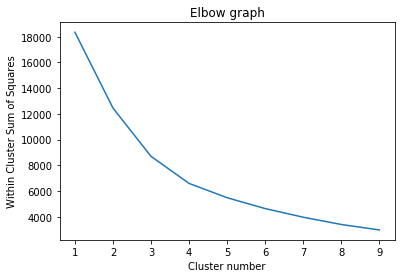

In [341]:
plt.plot(range(1,10), sumSquares)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [365]:
#number of cluster 4 because it start to do a soft descend
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(rfmScores)

In [367]:
rfm['clusters'] = clusters
rfm.head()

,Recency,Frequency,Monetary,refs,f_score,m_score,r_score,clusters
Customers.id,,,,,,,,
3736,0,1,24.54,1,1,1,5,1
2238,0,3,199.81,2,5,5,5,3
3730,0,1,14.85,3,1,1,5,1
3733,0,1,1099.00,4,1,5,5,2
3525,0,1,44.23,5,1,2,5,1


Text(0.5, 0, 'Monetary')

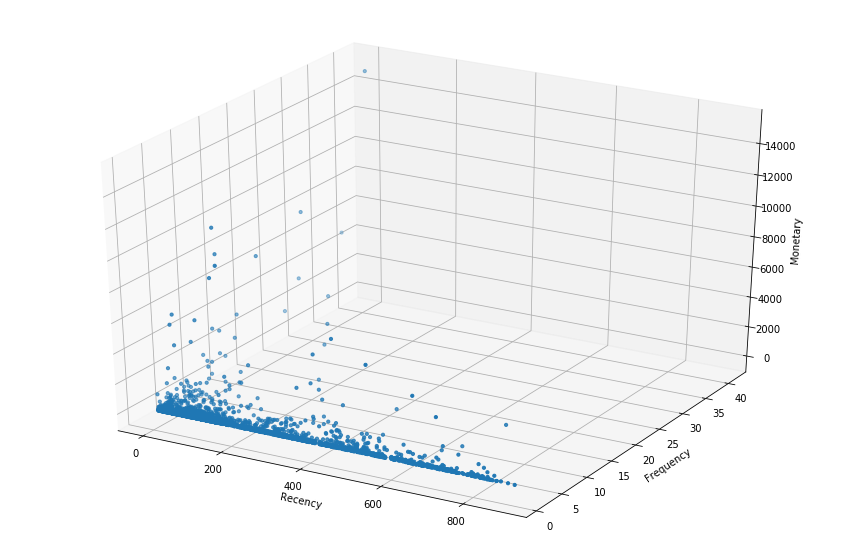

In [369]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm.Recency, rfm.Frequency, rfm.Monetary , s=10)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

In [368]:
rfm.clusters.unique()

array([1, 3, 2, 0, 4])

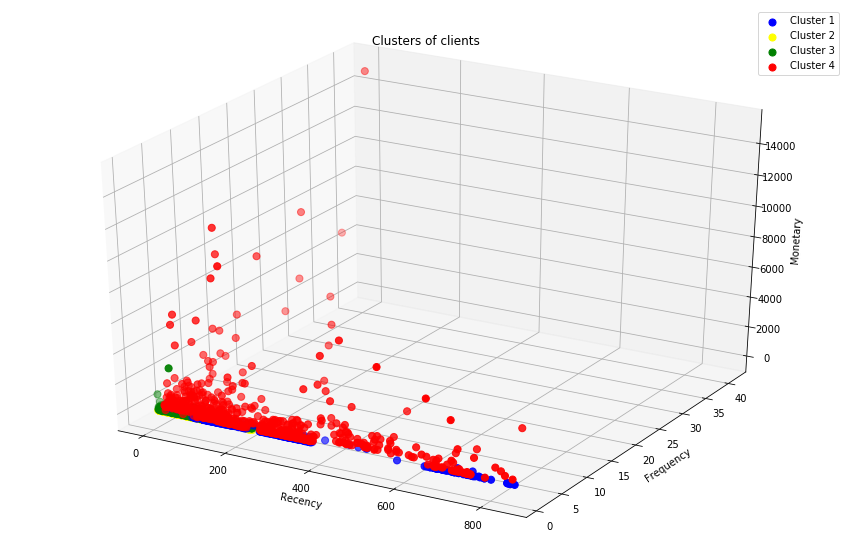

In [371]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']
for i in range(0,4):
    dx.scatter(rfm[rfm.clusters == i].Recency, 
               rfm[rfm.clusters == i].Frequency, 
               rfm[rfm.clusters == i].Monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)
dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

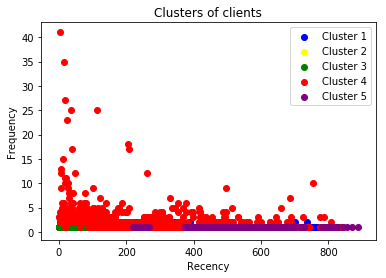

In [378]:
c1 = rfm[rfm.clusters == 0]
c2 = rfm[rfm.clusters == 1]
c3 = rfm[rfm.clusters == 2]
c4 = rfm[rfm.clusters == 3]
c5 = rfm[rfm.clusters == 4]

plt.scatter(c1.Recency, c1.Frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Recency, c4.Frequency, c = 'red', label = 'Cluster 4')
plt.scatter(c5.Recency, c5.Frequency, c = 'purple', label = 'Cluster 5')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

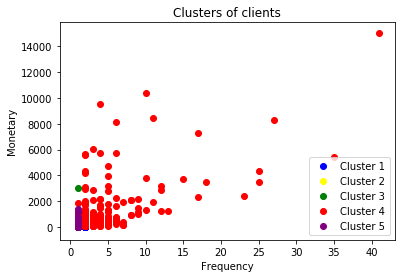

In [379]:
c1 = rfm[rfm.clusters == 0]
c2 = rfm[rfm.clusters == 1]
c3 = rfm[rfm.clusters == 2]
c4 = rfm[rfm.clusters == 3]
c5 = rfm[rfm.clusters == 4]

plt.scatter(c1.Frequency, c1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Frequency, c2.Monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Frequency, c3.Monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Frequency, c4.Monetary, c = 'red', label = 'Cluster 4')
plt.scatter(c5.Frequency, c5.Monetary, c = 'purple', label = 'Cluster 5')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

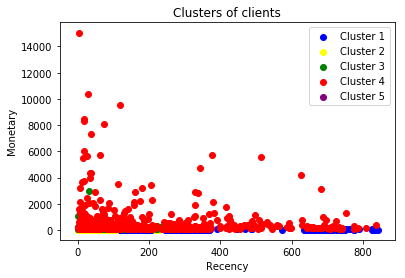

In [380]:
c1 = rfm[rfm.clusters == 0]
c2 = rfm[rfm.clusters == 1]
c3 = rfm[rfm.clusters == 2]
c4 = rfm[rfm.clusters == 3]
c5 = rfm[rfm.clusters == 5]

plt.scatter(c1.Recency, c1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Recency, c4.Monetary, c = 'red', label = 'Cluster 4')
plt.scatter(c5.Recency, c5.Monetary, c = 'purple', label = 'Cluster 5')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()